<a href="https://colab.research.google.com/github/silfersan/challenge-aluradatacience/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [62]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [63]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

faturamento_por_loja = todas_lojas.groupby('Loja')['Preço'].sum()

print("Faturamento por loja:")
for loja, faturamento in faturamento_por_loja.items():
    print(f'{loja}: R$ {faturamento:,.2f}')


Faturamento por loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria


In [64]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

quantidade_por_categoria = todas_lojas.groupby(['Loja', 'Categoria do Produto']).size()

quantidade_por_categoria = quantidade_por_categoria.reset_index(name='Quantidade')

print("Quantidade total de produtos vendidos por categoria em cada loja:")

for loja, dados in quantidade_por_categoria.groupby('Loja'):
    print(f"\n{loja}:")
    print(dados[['Categoria do Produto', 'Quantidade']].to_string(index=False))


Quantidade total de produtos vendidos por categoria em cada loja:

Loja 1:
 Categoria do Produto  Quantidade
           brinquedos         324
     eletrodomesticos         312
          eletronicos         448
      esporte e lazer         284
instrumentos musicais         182
               livros         173
               moveis         465
utilidades domesticas         171

Loja 2:
 Categoria do Produto  Quantidade
           brinquedos         313
     eletrodomesticos         305
          eletronicos         422
      esporte e lazer         275
instrumentos musicais         224
               livros         197
               moveis         442
utilidades domesticas         181

Loja 3:
 Categoria do Produto  Quantidade
           brinquedos         315
     eletrodomesticos         278
          eletronicos         451
      esporte e lazer         277
instrumentos musicais         177
               livros         185
               moveis         499
utilidades domesticas  

\# 3. Média de Avaliação das Lojas

In [65]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

media_avaliacao_por_loja = todas_lojas.groupby('Loja')['Avaliação da compra'].mean()

print("Média das avaliações por loja:")
print(media_avaliacao_por_loja.to_string())


Média das avaliações por loja:
Loja
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759


# 4. Produtos Mais e Menos Vendidos

---



In [66]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

vendas_por_produto = todas_lojas.groupby(['Loja', 'Produto']).size()

mais_vendido = vendas_por_produto.groupby('Loja').idxmax()

menos_vendido = vendas_por_produto.groupby('Loja').idxmin()

print("Produtos Mais e Menos Vendidos por Loja:")

for loja in vendas_por_produto.index.get_level_values('Loja').unique():
    produto_mais_vendido = mais_vendido[loja]
    produto_menos_vendido = menos_vendido[loja]

    print(f"\nLoja {loja}:")
    print(f"Produto Mais Vendido: {produto_mais_vendido[1]} com {vendas_por_produto[produto_mais_vendido]} vendas")
    print(f"Produto Menos Vendido: {produto_menos_vendido[1]} com {vendas_por_produto[produto_menos_vendido]} vendas")


Produtos Mais e Menos Vendidos por Loja:

Loja Loja 1:
Produto Mais Vendido: Guarda roupas com 60 vendas
Produto Menos Vendido: Celular ABXY com 33 vendas

Loja Loja 2:
Produto Mais Vendido: Iniciando em programação com 65 vendas
Produto Menos Vendido: Jogo de tabuleiro com 32 vendas

Loja Loja 3:
Produto Mais Vendido: Kit banquetas com 57 vendas
Produto Menos Vendido: Blocos de montar com 35 vendas

Loja Loja 4:
Produto Mais Vendido: Cama box com 62 vendas
Produto Menos Vendido: Guitarra com 33 vendas


# 5. Frete Médio por Loja:


In [67]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

frete_medio_por_loja = todas_lojas.groupby('Loja')['Frete'].mean()

print("Frete Médio por Loja:")
print(frete_medio_por_loja.to_string())

Frete Médio por Loja:
Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997


# **Graficos**

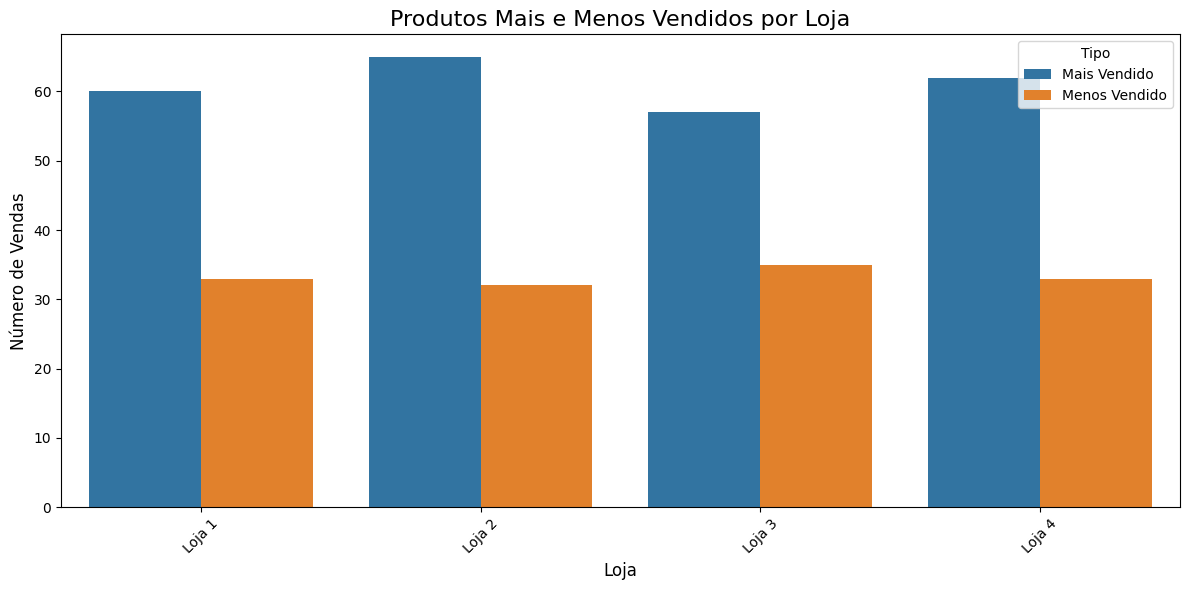

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

vendas_por_produto = todas_lojas.groupby(['Loja', 'Produto']).size()

mais_vendido = vendas_por_produto.groupby('Loja').idxmax()

menos_vendido = vendas_por_produto.groupby('Loja').idxmin()

dados = {
    'Loja': [],
    'Produto': [],
    'Vendas': [],
    'Tipo': []
}

for loja in vendas_por_produto.index.get_level_values('Loja').unique():
    produto_mais_vendido = mais_vendido[loja]
    dados['Loja'].append(loja)
    dados['Produto'].append(produto_mais_vendido[1])
    dados['Vendas'].append(vendas_por_produto[produto_mais_vendido])
    dados['Tipo'].append('Mais Vendido')

    produto_menos_vendido = menos_vendido[loja]
    dados['Loja'].append(loja)
    dados['Produto'].append(produto_menos_vendido[1])
    dados['Vendas'].append(vendas_por_produto[produto_menos_vendido])
    dados['Tipo'].append('Menos Vendido')

df_grafico = pd.DataFrame(dados)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grafico, x='Loja', y='Vendas', hue='Tipo')

plt.title('Produtos Mais e Menos Vendidos por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Número de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo', loc='upper right')

plt.tight_layout()
plt.show()


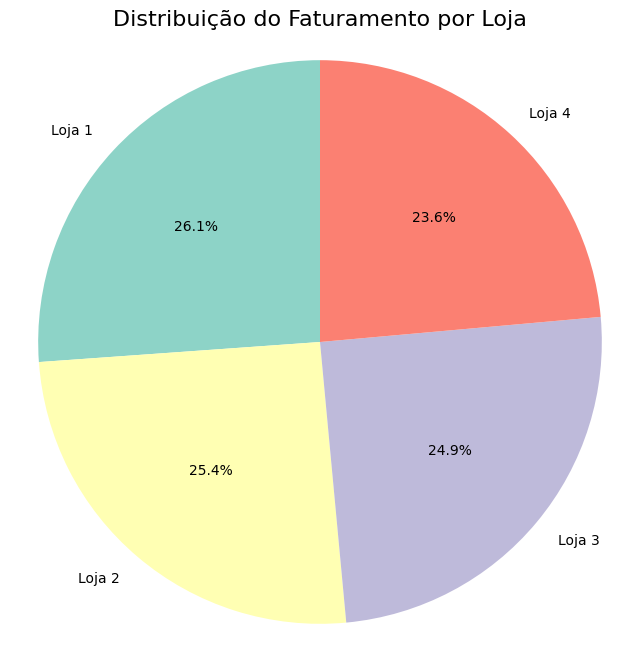

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

faturamento_por_loja = todas_lojas.groupby('Loja')['Preço'].sum()

plt.figure(figsize=(8, 8))
plt.pie(faturamento_por_loja, labels=faturamento_por_loja.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(faturamento_por_loja)))
plt.title('Distribuição do Faturamento por Loja', fontsize=16)

plt.axis('equal')
plt.show()


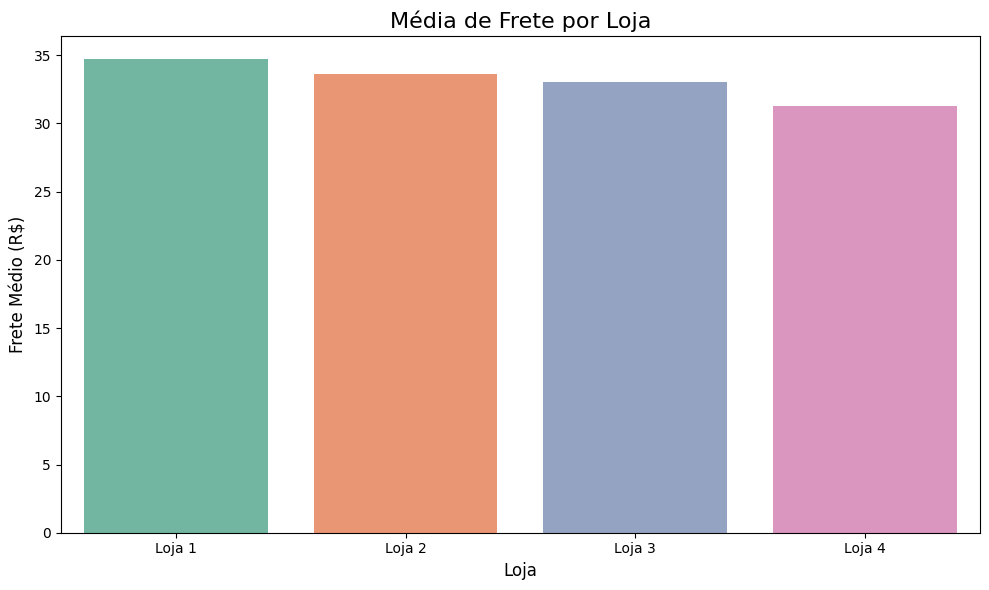

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

media_frete_por_loja = todas_lojas.groupby('Loja')['Frete'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=media_frete_por_loja, x='Loja', y='Frete', hue='Loja', palette='Set2', legend=False)

plt.title('Média de Frete por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)

plt.tight_layout()
plt.show()


### **Relatório**

Seu João, se o senhor quer vender sem se preocupar com nota de cliente ou ficar gastando muito, a Loja 4 é a melhor escolha.

Ela tem o menor faturamento, ou seja, menos movimentação e pressão. Os clientes não são tão exigentes, então dá pra vender tranquilo. Além disso, o frete não sai caro, o que ajuda a não ter prejuízo.

Se o foco é vender sem complicação, vai de Loja 4.